# Artificial Neural Network for the MINST Dataset

## Setup

- Features have the dimension ```N x 28 x 28``` (greyscale images, values from 00 to 255)
- Labels have the dimension ```N``` (Digits from 0 to 9)



In [2]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.1.0


In [0]:
# Load in the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
# Build the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # flatten the 2D image
    tf.keras.layers.Dense(128, activation='relu'), # first hidden layer
    tf.keras.layers.Dropout(0.2), # Dropout layer of 30% to prevent overfitting
    tf.keras.layers.Dense(10, activation='softmax') # output layer of K=10 because there are 10 different digits
])

In [0]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# Train the model
res = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.2933 - accuracy: 0.9147 - val_loss: 0.1418 - val_accuracy: 0.9571
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.1445 - accuracy: 0.9568 - val_loss: 0.1005 - val_accuracy: 0.9694
Epoch 3/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1083 - accuracy: 0.9679 - val_loss: 0.0834 - val_accuracy: 0.9754
Epoch 4/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0863 - accuracy: 0.9735 - val_loss: 0.0846 - val_accuracy: 0.9751
Epoch 5/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0725 - accuracy: 0.9779 - val_loss: 0.0760 - val_accuracy: 0.9772
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0638 - accuracy: 0.9791 - val_loss: 0.0743 - val_accuracy: 0.9775
Epoch 7/10
60000/60000 [==============================] 

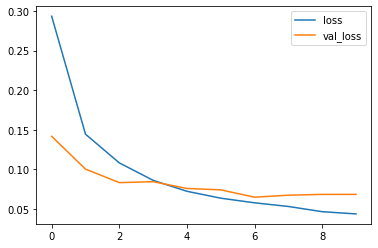

In [7]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
plt.plot(res.history['loss'], label='loss')
plt.plot(res.history['val_loss'], label='val_loss')
plt.legend()

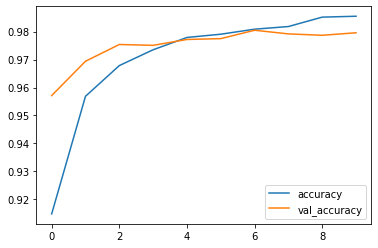

In [8]:
# Plot accuracy per iteration
plt.plot(res.history['accuracy'], label='accuracy')
plt.plot(res.history['val_accuracy'], label='val_accuracy')
plt.legend()


In [9]:
# Evaluate the model
print(model.evaluate(x_test, y_test))


10000/10000 [==============================] - 0s 43us/sample - loss: 0.0686 - accuracy: 0.9796
[0.06859314496526495, 0.9796]


Confusion matrix, without normalization
[[ 970    1    2    1    1    1    2    1    1    0]
 [   0 1127    2    1    0    1    1    0    3    0]
 [   2    1 1010    7    1    0    1    6    4    0]
 [   1    1    2  993    0    3    0    3    1    6]
 [   0    1    3    0  961    0    5    1    2    9]
 [   2    0    0    4    1  872    5    0    4    4]
 [   4    2    0    1    2    8  939    0    2    0]
 [   3    6    8    6    0    0    0  996    0    9]
 [   4    1    1    5    5    5    2    3  945    3]
 [   1    4    0    4    8    3    1    2    3  983]]


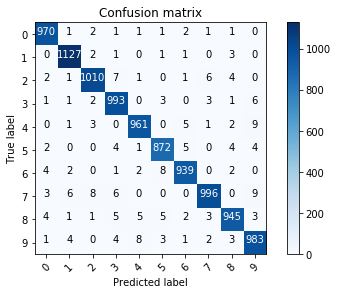

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

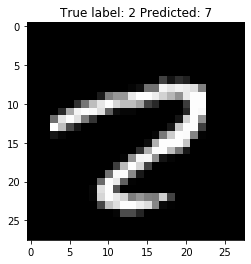

In [23]:
# Show some miscalssified images
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));